# Compare predictions
The goal is to extract the right predictions of BERT-base on the dev set, and pass only these subset to NetBERT to see if it performs at least as well as BERT-base. Then, extract the wrong predictions of BERT-base and see where NetBERT improves, which specific cases, which classes in particluar, which type of sentences (badly written, not clear?)

In [22]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
def plot_repartition(df):
    """
    """
    # Get the counts of each document type.
    count = df['Class'].value_counts()
    count_classes = count.index.tolist()
    count_values = count.values.tolist()

    # Create barplot.
    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(count_classes, count_values)

    # Rotate labels on x-axis.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

    # Set titles of plot and axes.
    plt.title("Queries for each document type", fontsize=24)
    plt.ylabel('Number of queries', fontsize=18)
    plt.xlabel('Document Type ', fontsize=18)

    #adding the count labels above rectangles.
    rects = ax.patches
    for rect, label in zip(rects, count_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, label, ha='center', va='bottom', fontsize=12)

    # Show the plot.
    plt.show()
    return

## BERT-base predictions

In [33]:
dirpath = '/raid/antoloui/Master-thesis/Code/Extrinsic_evaluation/Classification/output/bert_base_cased/'

with open(os.path.join(dirpath, 'map_classes.json')) as f:
    class_mappings = json.load(f)

### Right predictions

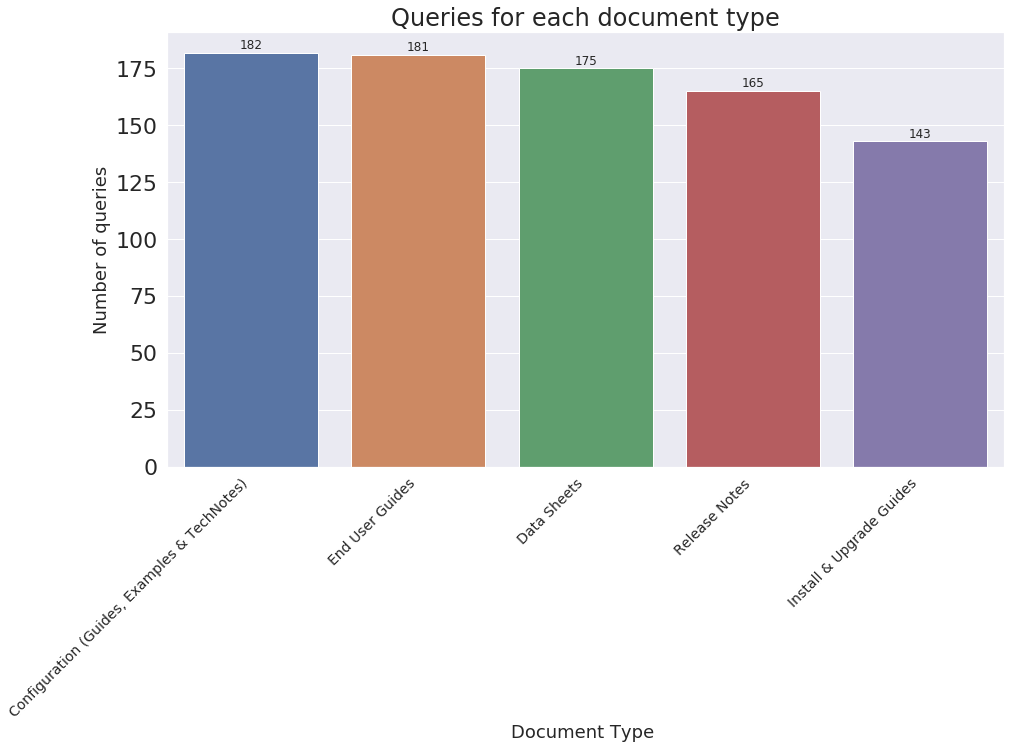

,Sentence,Class
0,what is UCS B200 M4 Blade Server?,Data Sheets
1,UCS Central Software: Chassis Profiles and Tem...,"Configuration (Guides, Examples & TechNotes)"
2,N7K OTV failover,Release Notes
3,dna center field portal,End User Guides
4,ordering guide call manager express,Install & Upgrade Guides
...,...,...
841,Deactivating Spanning Tree on a Catalyst 9500,"Configuration (Guides, Examples & TechNotes)"
842,interal testing keys email security appliance,End User Guides
843,Email Security Appliance: Anti-Spam: Understan...,End User Guides
844,Overview of the Cisco 4000 Series ISRs: USB Se...,Install & Upgrade Guides


In [37]:
# Load right predictions from BERT-base
df_bert_right = pd.read_csv(os.path.join(dirpath, 'right_predictions.csv'))

# Create columns with classes.
df_bert_right['Class'] = df_bert_right.apply(lambda row: class_mappings[str(row.Class_id)], axis=1)
df_bert_right['Prediction'] = df_bert_right.apply(lambda row: class_mappings[str(row.Prediction_id)], axis=1)

# Plot repartition of right predictions.
plot_repartition(df_bert_right)

# Save dataset for evaluation with NetBERT.
to_drop = ['Class_id', 'Prediction_id', 'Prediction']
df_bert_right.drop(to_drop, axis=1, inplace=True)
df_bert_right.to_csv(os.path.join(dirpath, 'eval_right_preds.csv'), index=False)
df_bert_right

### Wrong predictions 

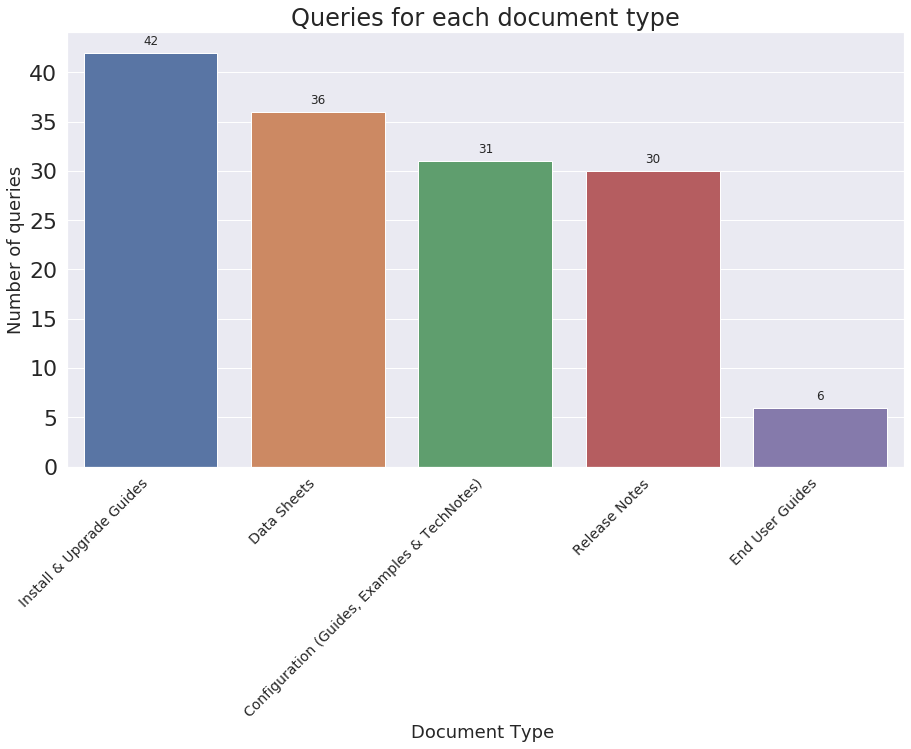

,Sentence,Class
0,c2960x issue with RPS,Install & Upgrade Guides
1,ISR 4K Data Sheet,Install & Upgrade Guides
2,ACI APIC - Configuring an Export Policy Using ...,Install & Upgrade Guides
3,VPC role preemption,Release Notes
4,Cisco DNA Center RMA TDM 1.3.1.0,End User Guides
...,...,...
140,WLC 5520 software,Data Sheets
141,what is the wireless controller for catalyst 9800,Release Notes
142,C4500 line cards,"Configuration (Guides, Examples & TechNotes)"
143,cabling SUPs on CAT 9400,Data Sheets


In [38]:
# Load right predictions from BERT-base
df_bert_wrong = pd.read_csv(os.path.join(dirpath, 'wrong_predictions.csv'))

# Create columns with classes.
df_bert_wrong['Class'] = df_bert_wrong.apply(lambda row: class_mappings[str(row.Class_id)], axis=1)
df_bert_wrong['Prediction'] = df_bert_wrong.apply(lambda row: class_mappings[str(row.Prediction_id)], axis=1)

# Plot repartition of right predictions.
plot_repartition(df_bert_wrong)

# Save dataset for evaluation with NetBERT.
to_drop = ['Class_id', 'Prediction_id', 'Prediction']
df_bert_wrong.drop(to_drop, axis=1, inplace=True)
df_bert_wrong.to_csv(os.path.join(dirpath, 'eval_wrong_preds.csv'), index=False)
df_bert_wrong